In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [25]:
allCompanies = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "PYPL", "TSLA", "GLNCY", "BHP", "RIO", "VALE", "CSUAY", "NGLOY", "ZIJMF", "WMT", "COST", "HD", "JD", "KR",  "WBA", "BABA", "TGT", "LOW", "LEN", "LGIH", "DFH", "PHM", "CAT", "CCS", "MTH", "TOL", "DHI", "KBH", "TM", "BYDDF", "VWAGY", "MBGYY", "STLA", "GM", "RACE", "F", "HMC"]

techCompanies = ["AAPL","MSFT","AMZN","TSLA","NVDA", "PYPL"]
df = pd.read_csv(allCompanies[0]+".csv", index_col=0)
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df["Change"] = (df["Close"] - df["Open"]) / df["Open"] * 100
# df = pd.DataFrame()
df



,Date,Open,High,Low,Close,Volume,Change
0,"Feb 24, 2023",147.11,147.19,145.72,146.71,"55,418,200",-0.271905
1,"Feb 23, 2023",150.09,150.34,147.24,149.40,"48,394,200",-0.459724
2,"Feb 22, 2023",148.87,149.95,147.16,148.91,"51,011,300",0.026869
3,"Feb 21, 2023",150.20,151.30,148.41,148.48,"58,867,200",-1.145140
4,"Feb 17, 2023",152.35,153.00,150.85,152.55,"59,095,900",0.131277
...,...,...,...,...,...,...,...
1220,"May 18, 2018",46.80,46.95,46.53,46.58,"73,190,800",-0.470085
1221,"May 17, 2018",47.00,47.23,46.59,46.75,"69,176,000",-0.531915
1222,"May 16, 2018",46.52,47.12,46.50,47.04,"76,732,400",1.117799
1223,"May 15, 2018",46.69,46.77,46.28,46.61,"94,780,800",-0.171343


In [26]:
for i in range(1,len(allCompanies)):
  dfNew = pd.read_csv(allCompanies[i]+".csv", index_col=0)
  dfNew['Open'] = pd.to_numeric(dfNew['Open'], errors='coerce')
  dfNew["Change"] = (dfNew["Close"] - dfNew["Open"]) / dfNew["Open"] * 100
  df = df.merge(dfNew, on="Date", suffixes=["_"+allCompanies[i-1],"_"+allCompanies[i]])
  #, how="outer") -> more training but decreases performance


last = allCompanies[len(allCompanies)-1]
# Readjust last one because its an exception
df = df.rename(columns={'Open': 'Open_'+last, 'High': 'High_'+last, 'Low' : 'Low_'+last, 'Close': 'Close_'+last, 'Volume': 'Volume_'+last, 'Change': 'Change_'+last})
df

,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Change_AAPL,Open_AMZN,High_AMZN,Low_AMZN,...,Low_F,Close_F,Volume_F,Change_F,Open_HMC,High_HMC,Low_HMC,Close_HMC,Volume_HMC,Change_HMC
0,"Feb 24, 2023",147.11,147.19,145.72,146.71,"55,418,200",-0.271905,93.53,94.14,92.32,...,11.75,11.88,"50,574,200",0.507614,25.80,25.87,25.64,25.75,"913,900",-0.193798
1,"Feb 23, 2023",150.09,150.34,147.24,149.40,"48,394,200",-0.459724,96.12,96.43,93.67,...,11.88,12.07,"57,952,800",-2.029221,25.96,26.05,25.78,25.89,"713,000",-0.269646
2,"Feb 22, 2023",148.87,149.95,147.16,148.91,"51,011,300",0.026869,95.10,97.01,94.80,...,12.14,12.21,"52,844,700",-0.245098,25.85,25.96,25.78,25.82,"870,100",-0.116054
3,"Feb 21, 2023",150.20,151.30,148.41,148.48,"58,867,200",-1.145140,95.34,95.61,94.27,...,12.17,12.20,"77,724,200",-4.088050,26.03,26.28,25.86,25.90,"2,141,300",-0.499424
4,"Feb 17, 2023",152.35,153.00,150.85,152.55,"59,095,900",0.131277,97.80,97.94,95.65,...,12.65,12.89,"54,345,400",0.546022,25.40,25.57,25.30,25.54,"832,400",0.551181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,"May 16, 2018",46.52,47.12,46.50,47.04,"76,732,400",1.117799,78.88,79.72,78.83,...,11.20,11.40,"28,976,700",1.694915,33.04,33.15,32.96,33.15,"284,100",0.332930
1776,"May 15, 2018",46.69,46.77,46.28,46.61,"94,780,800",-0.171343,79.39,79.39,78.26,...,11.06,11.22,"26,950,100",1.081081,33.04,33.06,32.79,32.85,"701,300",-0.575061
1777,"May 15, 2018",46.69,46.77,46.28,46.61,"94,780,800",-0.171343,79.39,79.39,78.26,...,11.06,11.22,"26,950,100",1.081081,33.04,33.06,32.79,32.85,"701,300",-0.575061
1778,"May 14, 2018",47.25,47.38,46.97,47.04,"83,115,200",-0.444444,80.20,80.56,80.00,...,11.17,11.18,"27,903,100",-0.445236,33.42,33.50,33.31,33.31,"490,400",-0.329144


In [ ]:
#df["Change_HMC"] = df["Change"]
# no longer needed as added above

<ipython-input-19-20abee587704>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Change_HMC"] = df["Change"]


In [14]:
df

,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Change_AAPL,Open_AMZN,High_AMZN,Low_AMZN,...,Low_F,Close_F,Volume_F,Change_F,Open_HMC,High_HMC,Low_HMC,Close_HMC,Volume_HMC,Change_HMC
0,"Feb 24, 2023",147.11,147.19,145.72,146.71,"55,418,200",-0.271905,93.53,94.14,92.32,...,11.75,11.88,"50,574,200",0.507614,25.80,25.87,25.64,25.75,"913,900",-0.193798
1,"Feb 23, 2023",150.09,150.34,147.24,149.40,"48,394,200",-0.459724,96.12,96.43,93.67,...,11.88,12.07,"57,952,800",-2.029221,25.96,26.05,25.78,25.89,"713,000",-0.269646
2,"Feb 22, 2023",148.87,149.95,147.16,148.91,"51,011,300",0.026869,95.10,97.01,94.80,...,12.14,12.21,"52,844,700",-0.245098,25.85,25.96,25.78,25.82,"870,100",-0.116054
3,"Feb 21, 2023",150.20,151.30,148.41,148.48,"58,867,200",-1.145140,95.34,95.61,94.27,...,12.17,12.20,"77,724,200",-4.088050,26.03,26.28,25.86,25.90,"2,141,300",-0.499424
4,"Feb 17, 2023",152.35,153.00,150.85,152.55,"59,095,900",0.131277,97.80,97.94,95.65,...,12.65,12.89,"54,345,400",0.546022,25.40,25.57,25.30,25.54,"832,400",0.551181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,"Jan 27, 2021",143.43,144.30,140.41,142.06,"140,843,800",-0.955170,167.07,167.33,160.35,...,10.70,10.79,"82,863,000",-2.087114,27.14,27.14,26.77,26.82,"1,328,400",-1.179071
766,"Jan 26, 2021",143.60,144.30,141.37,143.16,"98,390,600",-0.306407,164.82,166.90,164.14,...,11.12,11.19,"66,267,500",-1.061008,27.37,27.49,27.32,27.38,"723,300",0.036536
767,"Jan 25, 2021",143.07,145.09,136.54,142.92,"157,611,700",-0.104844,166.43,168.19,162.16,...,10.88,11.29,"118,954,500",-1.740644,27.27,27.35,26.92,27.24,"690,100",-0.110011
768,"Jan 22, 2021",136.28,139.85,135.02,139.07,"114,459,400",2.047256,165.22,166.10,164.16,...,11.34,11.52,"130,866,600",-1.200686,27.68,27.72,27.40,27.59,"936,100",-0.325145


In [15]:
columns = ["Change_"+a for a in allCompanies]
columns.append("Date")
dfPrices = df[columns]
# dfPrices = dfPrices.set_index(dfPrices["Date"])
dfPrices

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,Change_BHP,...,Change_TM,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date
0,-0.271905,-0.032075,-0.312395,1.037713,-0.296047,0.262648,0.068027,0.280141,-0.341588,0.498919,...,-0.838192,-0.927247,-0.058038,-0.886802,1.093211,0.693909,0.547148,0.507614,-0.193798,"Feb 24, 2023"
1,-0.459724,-0.312110,-1.150548,0.023256,-0.309125,0.955631,-0.922388,-0.902359,0.335289,-0.820837,...,-0.057542,-0.981767,0.224090,0.405680,0.389972,-4.384896,-0.685710,-2.029221,-0.269646,"Feb 23, 2023"
2,0.026869,0.725552,-0.141412,0.029228,-1.015388,0.226976,0.159236,1.480321,0.169779,-0.233173,...,-0.036049,-1.109185,-0.340329,-0.254712,0.758460,-0.824642,-0.462167,-0.245098,-0.116054,"Feb 22, 2023"
3,-1.145140,-0.797147,-1.276276,-1.279330,-0.711254,-1.642857,2.075702,-3.717255,-1.476620,-0.793413,...,-0.699201,-0.689655,-0.342075,-0.606673,-1.710914,-3.063870,-0.091241,-4.088050,-0.499424,"Feb 21, 2023"
4,0.131277,-0.613497,-0.504891,1.562684,-0.512741,-1.123388,-2.020997,4.160208,0.904605,-0.060168,...,0.541948,-0.846024,0.506472,0.452489,1.825677,0.395349,0.751255,0.546022,0.551181,"Feb 17, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,-0.955170,-3.256120,-2.751514,-3.677486,-2.142857,-2.358277,-2.028121,-0.713498,-1.823708,0.276378,...,-1.416822,-1.319018,1.503759,-0.058207,-0.265957,-2.874016,0.353477,-2.087114,-1.179071,"Jan 27, 2021"
766,-0.306407,0.904017,1.503600,1.405767,0.202709,-1.067747,-2.389631,-0.932252,-0.855920,0.439078,...,-0.013699,-0.029036,-0.046318,-0.334821,-0.636537,-2.528563,-1.222285,-1.061008,0.036536,"Jan 26, 2021"
767,-0.104844,-1.039476,-1.103822,-0.046739,0.178946,-0.936003,-2.383767,3.017544,2.749638,0.841403,...,-0.831362,-1.480861,0.189394,0.000000,-0.706033,-2.838944,-0.694609,-1.740644,-0.110011,"Jan 25, 2021"
768,2.047256,-0.369205,0.284870,0.915408,-0.497622,-0.196507,2.169065,1.477886,0.408163,2.007009,...,-0.168691,3.069767,0.228624,-0.828729,-1.223242,1.651376,-0.813807,-1.200686,-0.325145,"Jan 22, 2021"


In [ ]:
# pyplot.figure(figsize=(15,15))
# scatter_matrix(dfPrices ,figsize=(12,12))
# pyplot.show()

In [16]:
train_df = pd.concat([dfPrices.iloc[:, 0].shift(-1), dfPrices.iloc[:, 1:]], axis=1)
train_df.loc[train_df["Change_AAPL"] > 0, "positive"] = 3
train_df.loc[train_df["Change_AAPL"] <= 0, "positive"] = -3
train_df = train_df.dropna()
train_df

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,Change_BHP,...,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date,positive
0,-0.459724,-0.032075,-0.312395,1.037713,-0.296047,0.262648,0.068027,0.280141,-0.341588,0.498919,...,-0.927247,-0.058038,-0.886802,1.093211,0.693909,0.547148,0.507614,-0.193798,"Feb 24, 2023",-3.0
1,0.026869,-0.312110,-1.150548,0.023256,-0.309125,0.955631,-0.922388,-0.902359,0.335289,-0.820837,...,-0.981767,0.224090,0.405680,0.389972,-4.384896,-0.685710,-2.029221,-0.269646,"Feb 23, 2023",3.0
2,-1.145140,0.725552,-0.141412,0.029228,-1.015388,0.226976,0.159236,1.480321,0.169779,-0.233173,...,-1.109185,-0.340329,-0.254712,0.758460,-0.824642,-0.462167,-0.245098,-0.116054,"Feb 22, 2023",-3.0
3,0.131277,-0.797147,-1.276276,-1.279330,-0.711254,-1.642857,2.075702,-3.717255,-1.476620,-0.793413,...,-0.689655,-0.342075,-0.606673,-1.710914,-3.063870,-0.091241,-4.088050,-0.499424,"Feb 21, 2023",3.0
4,0.130285,-0.613497,-0.504891,1.562684,-0.512741,-1.123388,-2.020997,4.160208,0.904605,-0.060168,...,-0.846024,0.506472,0.452489,1.825677,0.395349,0.751255,0.546022,0.551181,"Feb 17, 2023",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-1.741686,0.080371,1.041215,-4.394256,1.409108,0.423207,1.187234,1.884169,0.147275,-0.642777,...,-0.854972,0.516917,4.125508,1.706037,2.325581,-0.581200,-1.107011,0.260417,"Jan 28, 2021",-3.0
765,-0.306407,-3.256120,-2.751514,-3.677486,-2.142857,-2.358277,-2.028121,-0.713498,-1.823708,0.276378,...,-1.319018,1.503759,-0.058207,-0.265957,-2.874016,0.353477,-2.087114,-1.179071,"Jan 27, 2021",-3.0
766,-0.104844,0.904017,1.503600,1.405767,0.202709,-1.067747,-2.389631,-0.932252,-0.855920,0.439078,...,-0.029036,-0.046318,-0.334821,-0.636537,-2.528563,-1.222285,-1.061008,0.036536,"Jan 26, 2021",-3.0
767,2.047256,-1.039476,-1.103822,-0.046739,0.178946,-0.936003,-2.383767,3.017544,2.749638,0.841403,...,-1.480861,0.189394,0.000000,-0.706033,-2.838944,-0.694609,-1.740644,-0.110011,"Jan 25, 2021",3.0


Cross Validated mean squared error: 1.556
how many days: 90


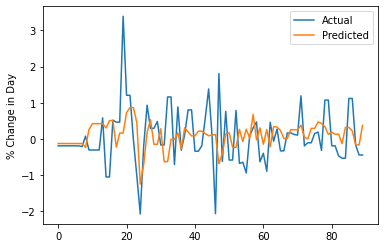

Num instances where predicted to go up and actually went up: 30
Num instances where predicted to go down and actually went down: 20
Num instances where predicted to go down and actually went up: 10
Num instances where predicted to go up and actually went down: 30
Proportion of instances where predicted correctly: 0.556
Proportion of instances where prediction was too low (would rather be >50%): 0.356


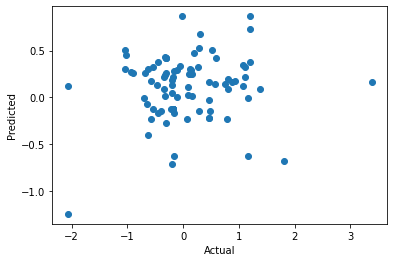

In [32]:
# @title Random Forest Regressor

#cross-validation

X = train_df.drop('Change_AAPL', axis=1)
X = X.drop('Date', axis=1)
X = X.drop('positive', axis=1)
y = train_df['Change_AAPL']

model_full = RandomForestRegressor()
scores = cross_val_score(model_full, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Validated mean squared error: {np.sqrt(abs(scores.mean())):.3f}")


#testing on last x days
x = int(input("how many days: "))
train = train_df[:-x]
test = train_df[-x:]

model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train = train.drop('Change_AAPL', axis=1)
X_train = X_train.drop('Date', axis=1)
X_train = X_train.drop('positive', axis=1)
y_train = train['Change_AAPL']

model.fit(X_train, y_train)


X_test = test.drop('Change_AAPL', axis=1)
X_test = X_test.drop('Date', axis=1)
X_test = X_test.drop('positive', axis=1)
y_test = test['Change_AAPL']
y_pred = model.predict(X_test)



#plotting results
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylabel("% Change in Day")
plt.legend()
plt.show()

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Calculate the proportion of instances where both y_test and y_pred are either greater than zero or less than zero
positive_positive = ((y_test > 0) & (y_pred > 0)).sum() / len(y_test)
negative_negative = ((y_test < 0) & (y_pred < 0)).sum() / len(y_test)

# Print the results
a_positive_p_positive = ((y_test > 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went up: {a_positive_p_positive:}")
a_negative_p_negative = ((y_test < 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went down: {a_negative_p_negative:}")

a_positive_p_negative = ((y_test > 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went up: {a_positive_p_negative:}")
a_negative_p_positive = ((y_test < 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went down: {a_negative_p_positive:}")

predicted_correctly = positive_positive + negative_negative

# Print the results
print(f"Proportion of instances where predicted correctly: {predicted_correctly:.3f}")

undershot = (y_test - y_pred > 0).sum()
overshot = (y_test - y_pred < 0).sum()
print(f"Proportion of instances where prediction was too low (would rather be >50%): {undershot / (undershot + overshot):.3f}")

Cross Validated mean squared error: 2.954
how many days: 90


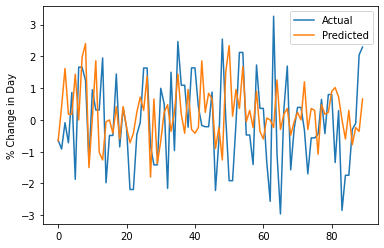

Num instances where predicted to go up and actually went up: 25
Num instances where predicted to go down and actually went down: 22
Num instances where predicted to go down and actually went up: 13
Num instances where predicted to go up and actually went down: 25
Proportion of instances where predicted correctly: 0.522


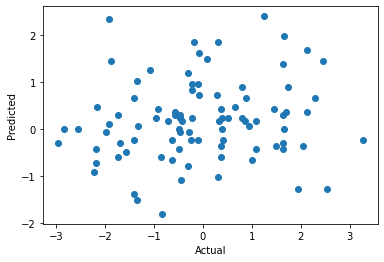

In [ ]:
# @title Random Forest Regressor dummy variable

#cross-validation

X = train_df.drop('Change_AAPL', axis=1)
X = X.drop('Date', axis=1)
X = X.drop('positive', axis=1)
y = train_df['positive']

model_full = RandomForestRegressor()
scores = cross_val_score(model_full, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Validated mean squared error: {np.sqrt(abs(scores.mean())):.3f}")


#testing on last x days
x = int(input("how many days: "))
train = train_df[:-x]
test = train_df[-x:]

model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train = train.drop('Change_AAPL', axis=1)
X_train = X_train.drop('Date', axis=1)
X_train = X_train.drop('positive', axis=1)
y_train = train['positive']

model.fit(X_train, y_train)


X_test = test.drop('Change_AAPL', axis=1)
X_test = X_test.drop('Date', axis=1)
X_test = X_test.drop('positive', axis=1)
y_test = test['Change_AAPL']
y_pred = model.predict(X_test)



#plotting results
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylabel("% Change in Day")
plt.legend()
plt.show()

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Calculate the proportion of instances where both y_test and y_pred are either greater than zero or less than zero
positive_positive = ((y_test > 0) & (y_pred > 0)).sum() / len(y_test)
negative_negative = ((y_test < 0) & (y_pred < 0)).sum() / len(y_test)

# Print the results
a_positive_p_positive = ((y_test > 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went up: {a_positive_p_positive:}")
a_negative_p_negative = ((y_test < 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went down: {a_negative_p_negative:}")

a_positive_p_negative = ((y_test > 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went up: {a_positive_p_negative:}")
a_negative_p_positive = ((y_test < 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went down: {a_negative_p_positive:}")

predicted_correctly = positive_positive + negative_negative

# Print the results
print(f"Proportion of instances where predicted correctly: {predicted_correctly:.3f}")



Cross Validated mean squared error: 1.638
how many days: 90


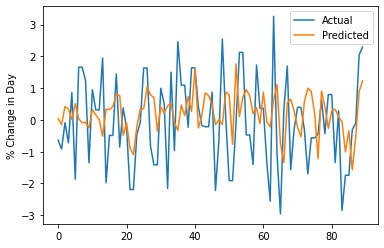

Num instances where predicted to go up and actually went up: 28
Num instances where predicted to go up and actually went up: 19
Num instances where predicted to go down and actually went up: 12
Num instances where predicted to go up and actually went down: 31
Proportion of instances where predicted correctly: 0.522


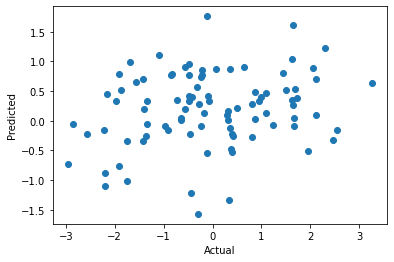

In [ ]:
# @title Linear Regressor

#cross-validation

X = train_df.drop('Change_AAPL', axis=1)
X = X.drop('Date', axis=1)
X = X.drop('positive', axis=1)
y = train_df['Change_AAPL']

model_full = LinearRegression()
scores = cross_val_score(model_full, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Validated mean squared error: {np.sqrt(abs(scores.mean())):.3f}")


#testing on last x days
x = int(input("how many days: "))
train = train_df[:-x]
test = train_df[-x:]

model = LinearRegression()

X_train = train.drop('Change_AAPL', axis=1)
X_train = X_train.drop('Date', axis=1)
X_train = X_train.drop('positive', axis=1)
y_train = train['Change_AAPL']

model.fit(X_train, y_train)


X_test = test.drop('Change_AAPL', axis=1)
X_test = X_test.drop('Date', axis=1)
X_test = X_test.drop('positive', axis=1)
y_test = test['Change_AAPL']
y_pred = model.predict(X_test)



#plotting results
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylabel("% Change in Day")
plt.legend()
plt.show()

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Calculate the proportion of instances where both y_test and y_pred are either greater than zero or less than zero
positive_positive = ((y_test > 0) & (y_pred > 0)).sum() / len(y_test)
negative_negative = ((y_test < 0) & (y_pred < 0)).sum() / len(y_test)

# Print the results
a_positive_p_positive = ((y_test > 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went up: {a_positive_p_positive:}")
a_negative_p_negative = ((y_test < 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go up and actually went up: {a_negative_p_negative:}")

a_positive_p_negative = ((y_test > 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went up: {a_positive_p_negative:}")
a_negative_p_positive = ((y_test < 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went down: {a_negative_p_positive:}")

predicted_correctly = positive_positive + negative_negative

# Print the results
print(f"Proportion of instances where predicted correctly: {predicted_correctly:.3f}")



# Niall

# APPLE Tech Prediction

In [27]:

techCompanies = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "PYPL", "TSLA"]
miningCompanies = ["GLNCY", "BHP", "RIO", "VALE", "CSUAY", "NGLOY", "ZIJMF"]
retailCompanies = ["WMT", "COST", "HD", "JD", "KR",  "WBA", "BABA", "TGT", "LOW"]
constructionCompanies = ["LEN", "LGIH", "DFH", "PHM", "CAT", "CCS", "MTH", "TOL", "DHI", "KBH"]
carCompanies = ["TM", "BYDDF", "VWAGY", "MBGYY", "STLA", "GM", "RACE", "F", "HMC"]

In [28]:
columns = ["Change_"+a for a in techCompanies]
columns.append("Date")
dfAppleTech = df[columns]
# dfPrices = dfPrices.set_index(dfPrices["Date"])
dfAppleTech

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Date
0,-0.271905,-0.032075,-0.312395,1.037713,-0.296047,0.262648,0.068027,0.280141,"Feb 24, 2023"
1,-0.459724,-0.312110,-1.150548,0.023256,-0.309125,0.955631,-0.922388,-0.902359,"Feb 23, 2023"
2,0.026869,0.725552,-0.141412,0.029228,-1.015388,0.226976,0.159236,1.480321,"Feb 22, 2023"
3,-1.145140,-0.797147,-1.276276,-1.279330,-0.711254,-1.642857,2.075702,-3.717255,"Feb 21, 2023"
4,0.131277,-0.613497,-0.504891,1.562684,-0.512741,-1.123388,-2.020997,4.160208,"Feb 17, 2023"
...,...,...,...,...,...,...,...,...,...
1775,1.117799,0.608519,0.408391,-0.272183,NaN,0.819672,0.412903,0.951374,"May 16, 2018"
1776,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,"May 15, 2018"
1777,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,"May 15, 2018"
1778,-0.444444,-0.149626,0.018182,-0.570028,0.112337,-0.281162,-0.416983,-3.758655,"May 14, 2018"


In [ ]:
train_df = pd.concat([dfAppleTech.iloc[:, 0].shift(-1), dfAppleTech.iloc[:, 1:]], axis=1)
train_df.loc[train_df["Change_AAPL"] > 0, "positive"] = 3
train_df.loc[train_df["Change_AAPL"] <= 0, "positive"] = -3
train_df = train_df.dropna()
train_df

# Note
# droping rows where there is only one NaN limits out testing ability a lot

Cross Validated mean squared error: 1.549
how many days: 100


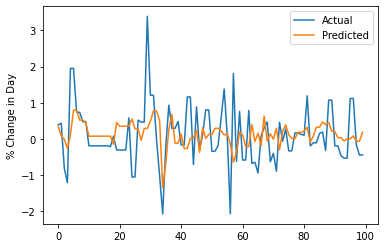

Num instances where predicted to go up and actually went up: 38
Num instances where predicted to go down and actually went down: 15
Num instances where predicted to go down and actually went up: 10
Num instances where predicted to go up and actually went down: 37
Proportion of instances where predicted correctly: 0.530
Proportion of instances where prediction was too low (would rather be >50%): 0.390


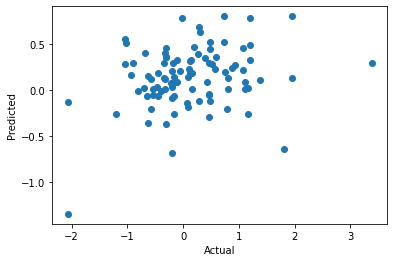

In [31]:
# @title Random Forest Regressor

#cross-validation

X = train_df.drop('Change_AAPL', axis=1)
X = X.drop('Date', axis=1)
X = X.drop('positive', axis=1)
y = train_df['Change_AAPL']

model_full = RandomForestRegressor()
scores = cross_val_score(model_full, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Validated mean squared error: {np.sqrt(abs(scores.mean())):.3f}")


#testing on last x days
x = int(input("how many days: "))
train = train_df[:-x]
test = train_df[-x:]

model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train = train.drop('Change_AAPL', axis=1)
X_train = X_train.drop('Date', axis=1)
X_train = X_train.drop('positive', axis=1)
y_train = train['Change_AAPL']

model.fit(X_train, y_train)


X_test = test.drop('Change_AAPL', axis=1)
X_test = X_test.drop('Date', axis=1)
X_test = X_test.drop('positive', axis=1)
y_test = test['Change_AAPL']
y_pred = model.predict(X_test)



#plotting results
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylabel("% Change in Day")
plt.legend()
plt.show()

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Calculate the proportion of instances where both y_test and y_pred are either greater than zero or less than zero
positive_positive = ((y_test > 0) & (y_pred > 0)).sum() / len(y_test)
negative_negative = ((y_test < 0) & (y_pred < 0)).sum() / len(y_test)

# Print the results
a_positive_p_positive = ((y_test > 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went up: {a_positive_p_positive:}")
a_negative_p_negative = ((y_test < 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went down: {a_negative_p_negative:}")

a_positive_p_negative = ((y_test > 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went up: {a_positive_p_negative:}")
a_negative_p_positive = ((y_test < 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went down: {a_negative_p_positive:}")

predicted_correctly = positive_positive + negative_negative

# Print the results
print(f"Proportion of instances where predicted correctly: {predicted_correctly:.3f}")

undershot = (y_test - y_pred > 0).sum()
overshot = (y_test - y_pred < 0).sum()
print(f"Proportion of instances where prediction was too low (would rather be >50%): {undershot / (undershot + overshot):.3f}")